Here is a short demonstration of Kipoi-interpret.

In [233]:
import kipoi
import kipoi_interpret
from kipoi_veff.utils.plot import seqlogo_heatmap
from concise.preprocessing.sequence import encodeDNA

In [240]:
# list all available methods
kipoi_interpret.importance_scores.available_methods()

{'deeplift': kipoi_interpret.importance_scores.referencebased.DeepLift,
 'grad': kipoi_interpret.importance_scores.gradient.Gradient,
 'grad*input': kipoi_interpret.importance_scores.gradient.GradientXInput,
 'intgrad': kipoi_interpret.importance_scores.referencebased.IntegratedGradients,
 'mutation': kipoi_interpret.importance_scores.ism.Mutation,
 'saliency': kipoi_interpret.importance_scores.gradient.Saliency}

In [235]:
# Gradient-based methods
from kipoi_interpret.importance_scores.gradient import Gradient, GradientXInput
# In-silico mutagenesis-based methods
from kipoi_interpret.importance_scores.ism import Mutation
# DeepLift
from kipoi_interpret.importance_scores.referencebased import DeepLift

### Setup 

Model:

In [236]:
model = kipoi.get_model("DeepBind/Homo_sapiens/TF/D00765.001_ChIP-seq_GATA1")

2018-07-20 01:41:36,856 [INFO] git-lfs pull -I DeepBind/Homo_sapiens/TF/D00765.001_ChIP-seq_GATA1/**
2018-07-20 01:41:36,923 [INFO] git-lfs pull -I DeepBind/template/**
2018-07-20 01:41:36,981 [INFO] model DeepBind/Homo_sapiens/TF/D00765.001_ChIP-seq_GATA1 loaded
2018-07-20 01:41:37,014 [INFO] git-lfs pull -I DeepBind/Homo_sapiens/TF/D00765.001_ChIP-seq_GATA1/./**
2018-07-20 01:41:37,068 [INFO] git-lfs pull -I DeepBind/template/**
2018-07-20 01:41:37,129 [INFO] dataloader DeepBind/Homo_sapiens/TF/D00765.001_ChIP-seq_GATA1/. loaded
2018-07-20 01:41:37,140 [INFO] successfully loaded the dataloader from /home/avsec/.kipoi/models/DeepBind/Homo_sapiens/TF/D00765.001_ChIP-seq_GATA1/dataloader.py::SeqDataset
2018-07-20 01:41:37,206 [INFO] successfully loaded model architecture from <_io.TextIOWrapper name='model_files/model.json' mode='r' encoding='UTF-8'>
2018-07-20 01:41:37,265 [INFO] successfully loaded model weights from model_files/model.h5
2018-07-20 01:41:37,267 [INFO] dataloader.outpu

Sequence of interest:

In [186]:
seq = "ATGGGCCAGCACACAGACCAGCACGTTGCCCAGGAGCTGTGGGAGGAAGATAAGAGGTATGAACATGATTAGCAAAAGGGCCTAGCTTGGACTCAGAATAA"
seqa = encodeDNA([seq]) # one-hot-encode the sequence

## Gradient * input

In [128]:
grxinp = GradientXInput(model)
val = grxinp.score(seqa)[0]

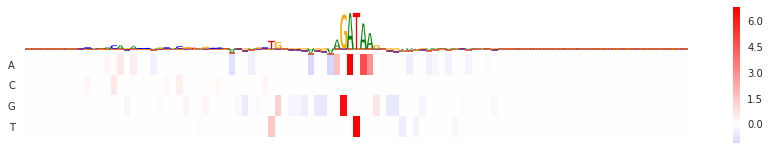

In [141]:
fig = plt.figure(figsize=(15,2.5))
seqlogo_heatmap(val, val.T, ax=plt.subplot())

## Gradient

In [143]:
gr = Gradient(model)
val = gr.score(seqa)[0]

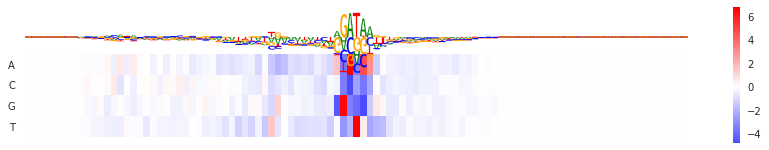

In [144]:
fig = plt.figure(figsize=(15,2.5))
seqlogo_heatmap(val, val.T, ax=plt.subplot())

## In-silico mutagenesis

In [170]:
# TODO - update the Mutate function. It should return the following:
# prediction_value:
#   - array
def to_array(isval):
    """Temporary convert the output to a numpy array
    """
    def to_vec(x):
        if x is None:
            return 0
        else:
            if isinstance(x, list):
                return x[0]
            else:
                return x
    return np.array([[to_vec(y) for y in x] for x in isval])

In [171]:
ism = Mutation(model, "seq")
val = to_array(ism.score(seqa)[0])

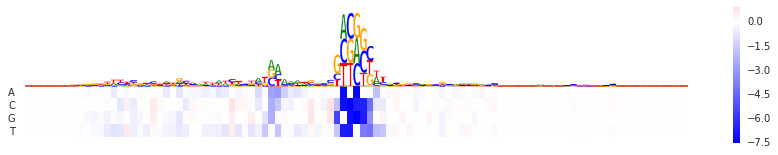

In [181]:
fig = plt.figure(figsize=(15,2.5))
seqlogo_heatmap(np.abs(val), val.T, ax=plt.subplot(), show_letter_scale=False)

## DeepLift

In [239]:
# Not a sequential model
# dl = DeepLift(model, 'maximum_593', 0)